# **Sales price study**

### Objectives

- Answer business requirement 1:
    - The client seeks to understand how various attributes of their houses influence the typical sale price.

- Data Visualization.

- Data Exploration.

- Conclusion.

### Inputs

* inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv 

### Outputs

* Data that answers business requirements.

### Additional Comments

* This file and its contents were inspired by and adapted from the Churnometer Walkthrough Project 2. 


---

### Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

### Import packages

In [ ]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from ydata_profiling import ProfileReport

### Load Data

In [ ]:
df = (pd.read_csv(f"inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv")
    )
df.head()

---

### Data Exploration

Generates a minimal profiling report of the DataFrame df using ydata_profiling and displays it directly within a notebook as an iframe:

In [ ]:
pd_report = ProfileReport(df=df, minimal=True)
pd_report.to_notebook_iframe()

Dataset info:

In [ ]:
df.info()

### Correlation Study

We use .corr() for spearman and pearson methods, and investigate the top 10 correlations
- We know this command returns a pandas series and the first item is the correlation between SalePrice - 'Pearson' and SalePrice - 'Spearman'.
- We sort values considering the absolute value, by setting key=abs

Spearman:

In [ ]:
corr_spearman = df.corr(method='spearman', numeric_only=True)['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(20)
corr_spearman

Spearman Summary: The Spearman correlation analysis reveals that Overall Quality, Above Ground Living Area (GrLivArea), and Year Built have the highest positive correlations with Sale Price, suggesting these features have strong ranked associations with property value. Other moderately influential features include Garage Area, Total Basement Area (TotalBsmtSF), and Garage Year Built, indicating the importance of living space and property condition. Negative correlations with features like Enclosed Porch and Overall Condition suggest these factors might reduce the property's appeal.

Pearson:

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_pearson = numeric_df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(50)
corr_pearson

Pearson Summary: The Pearson correlation analysis similarly highlights Overall Quality and GrLivArea as the strongest linear predictors of Sale Price, followed by Garage Area and Total Basement Area. Moderate positive correlations with Year Built and Year Remodeled also indicate that newer or updated homes tend to have higher values. Notable weak negative correlations are seen with Enclosed Porch and Overall Condition, which may slightly detract from house prices.

Based on the correlation analysis, the five most interesting variables to study further, considering their influence on the Sale Price, are:

In [ ]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

The following variables will be used to predict sales price:

In [21]:
corr_var_list = list(set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list()))
corr_var_list

['GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'YearBuilt']

### EDA on selected variables

In [ ]:
df_eda = df.filter(corr_var_list + ['SalePrice'])
print(df_eda.shape)
df_eda.head(5)

### Visualization of selected variables:

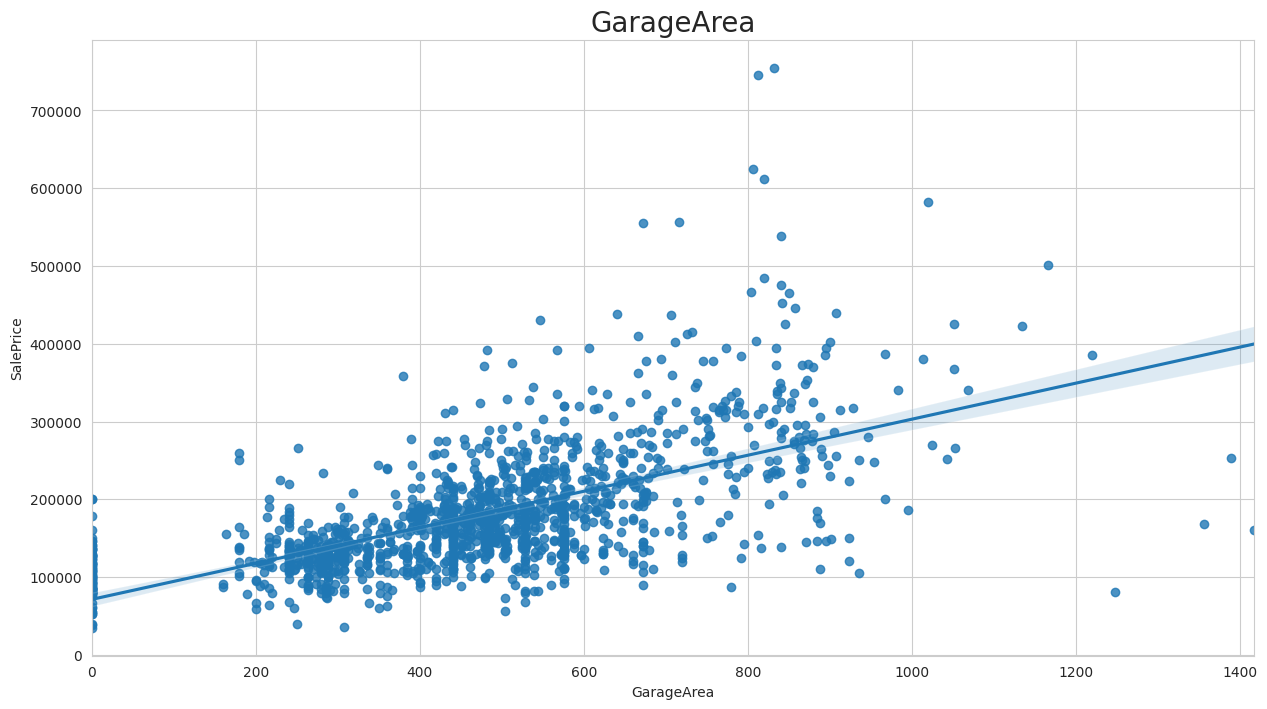

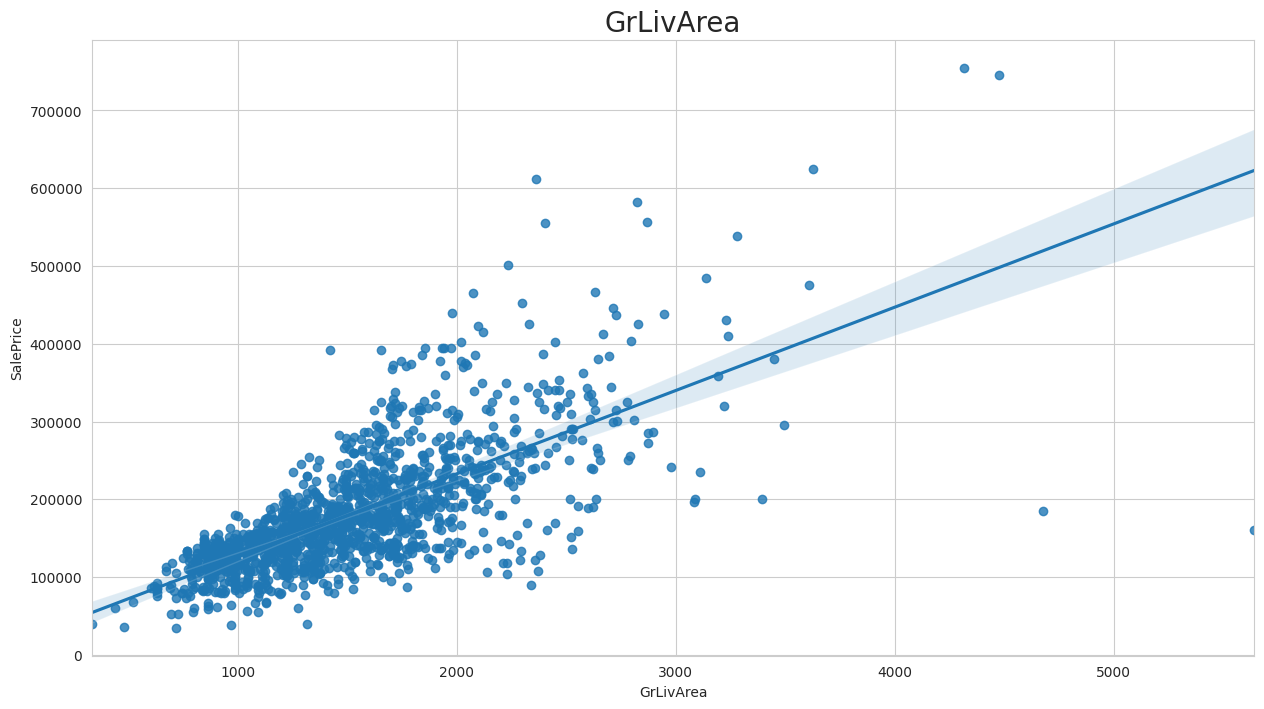

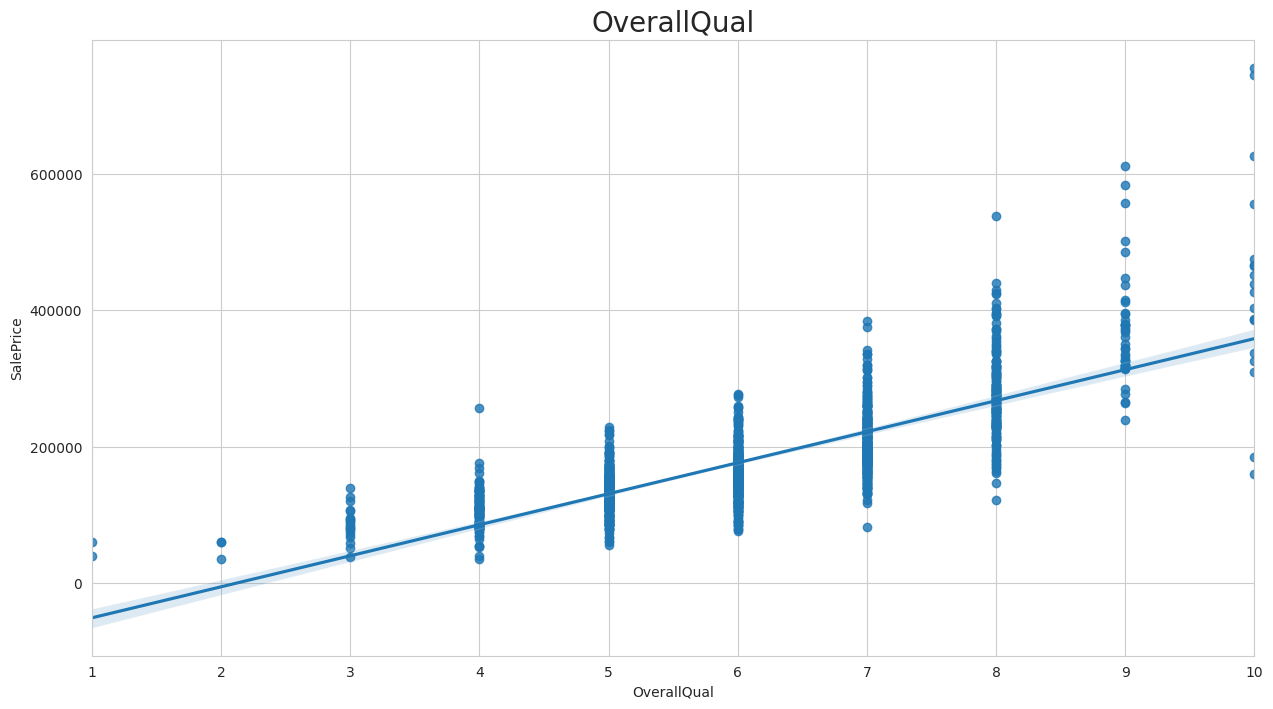

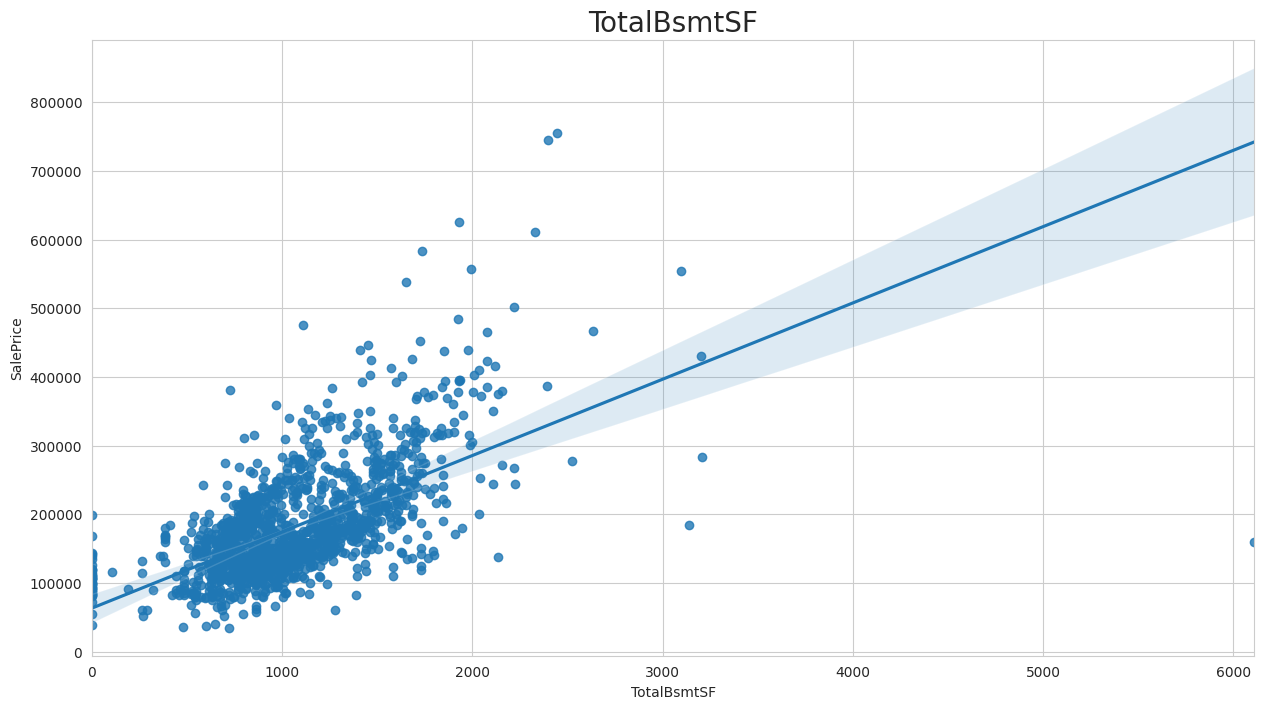

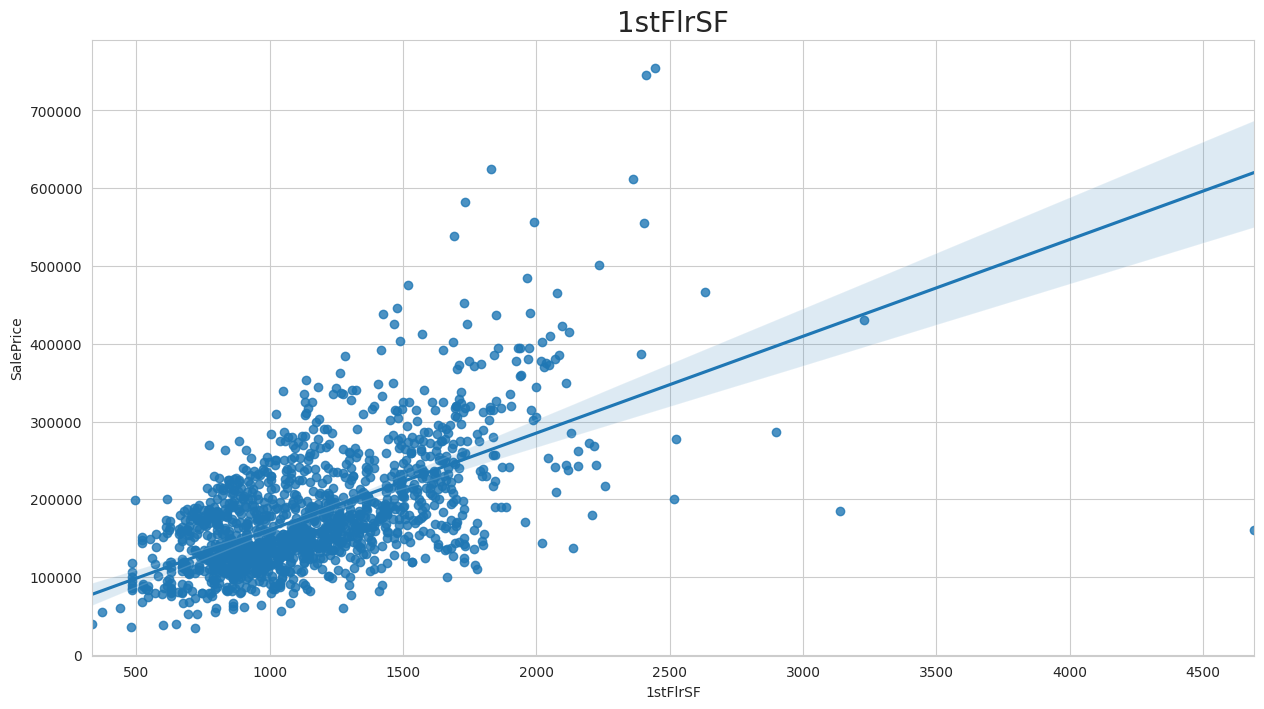

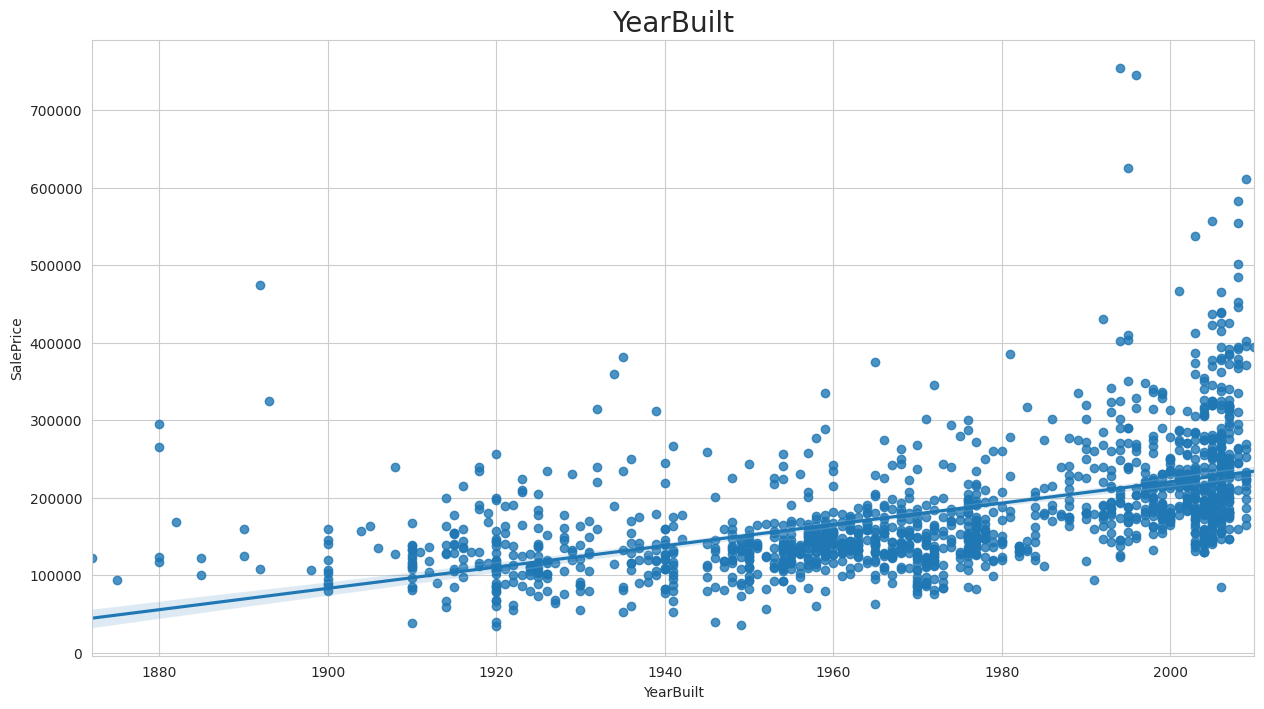

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

def plot_numerical(df, col, target_var):
  plt.figure(figsize=(15, 8))
  sns.regplot(data=df, x=col, y=target_var)  
  plt.title(f"{col}", fontsize=20)
  plt.show()


target_var = 'SalePrice'
for col in corr_var_list:
  plot_numerical(df_eda, col, target_var)
  print("\n\n")

### Conclusions 
- Garage Area: Indicates that the size of the garage is a strong factor in determining a home’s value, likely due to the added utility and storage space it provides.

- Above Ground Living Area (GrLivArea): Larger living areas above ground are highly valued, emphasizing the importance of spacious, functional living space.

- Overall Quality (OverallQual): High-quality construction and materials are strongly associated with higher prices, reflecting buyer preference for well-built properties.

- Total Basement Area (TotalBsmtSF): A larger basement area contributes to home value, potentially due to its flexibility for additional living or storage space.

- First Floor Area (1stFlrSF): The size of the first floor is a key factor, as a larger main floor can improve layout and accessibility.

- Year Built: Newer properties generally sell for more, as modern construction standards and newer materials are appealing to buyers.